In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
ffball_2023 = pd.read_csv('FantasyPros_Fantasy_Football_Points_PPR.csv')
ffball_2022 = pd.read_csv('FantasyPros_Fantasy_Football_Points_PPR-2.csv')
ffball_2021 = pd.read_csv('FantasyPros_Fantasy_Football_Points_PPR-3.csv')
ffball_2020 = pd.read_csv('FantasyPros_Fantasy_Football_Points_PPR-4.csv')

In [67]:
ffball_2020.drop(['Player', 'Team', '#'], axis=1, inplace=True)
ffball_2021.drop(['Player', 'Team', '#'], axis=1, inplace=True)
ffball_2022.drop(['Player', 'Team', '#'], axis=1, inplace=True)
ffball_2023.drop(['Player', 'Team', '#'], axis=1, inplace=True)

# COLUMN NAMES
- #'
- Player
- Pos
- Team
- 1
- 18

In [68]:
ffball_22_23 = pd.concat([ffball_2023, ffball_2022])
ffball_21_23 = pd.concat([ffball_2023, ffball_2022, ffball_2021])
ffball_20_23 = pd.concat([ffball_2023, ffball_2022, ffball_2021, ffball_2020])

## 2021-2023 RB, QB, WR Data Cleaning

In [69]:
# RB 21_23
rb_21_23 = ffball_21_23[ffball_21_23['Pos'] == 'RB']
rb_21_23 = rb_21_23[rb_21_23['AVG'] >= 5]
rb_21_23 = rb_21_23.replace(to_replace='-', value=0)
rb_21_23 = rb_21_23.replace(to_replace='BYE', value=0)
rb_21_23 = rb_21_23.iloc[:,1:].astype(float)
rb_21_23 = rb_21_23[rb_21_23.iloc[:, 1:].eq(0).sum(axis=1) < 6]

# QB 21_23
qb_21_23 = ffball_21_23[ffball_21_23['Pos'] == 'QB']
qb_21_23 = qb_21_23[qb_21_23['AVG'] >= 5]
qb_21_23 = qb_21_23.replace(to_replace='-', value=0)
qb_21_23 = qb_21_23.replace(to_replace='BYE', value=0)
qb_21_23 = qb_21_23.iloc[:,1:].astype(float)
qb_21_23 = qb_21_23[qb_21_23.iloc[:, 1:].eq(0).sum(axis=1) < 6]

# WR 21_23
wr_21_23 = ffball_21_23[ffball_21_23['Pos'] == 'WR']
wr_21_23 = wr_21_23[wr_21_23['AVG'] >= 5]
wr_21_23 = wr_21_23.replace(to_replace='-', value=0)
wr_21_23 = wr_21_23.replace(to_replace='BYE', value=0)
wr_21_23 = wr_21_23.iloc[:,1:].astype(float)
wr_21_23 = wr_21_23[wr_21_23.iloc[:, 1:].eq(0).sum(axis=1) < 6]


## 2021-2023 RB, QB, WR Analysis

0.7367629409566715


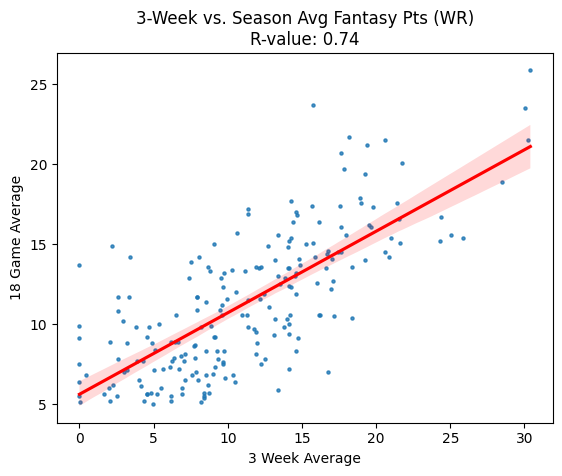

In [83]:
# WR
wr_21_23_3week = wr_21_23.iloc[:,:3]
wr_21_23_3week['AVG'] = ((wr_21_23_3week['1'] + wr_21_23_3week['2'] + wr_21_23_3week['3']) / 3).round(2)

wr_21_23_3week_lowscoring = wr_21_23_3week[(wr_21_23_3week['AVG'] >= 6) & (wr_21_23_3week['AVG'] <= 8)]
sns.regplot(x=wr_21_23_3week['AVG'],y=wr_21_23['AVG'], scatter_kws={'s':5}, line_kws={'color':'red'})
plt.xlabel('3 Week Average')
plt.ylabel('18 Game Average')
rval = np.corrcoef(wr_21_23_3week['AVG'], wr_21_23['AVG'])[0,1]
plt.title(f"3-Week vs. Season Avg Fantasy Pts (WR)\nR-value: {rval.round(2)}")
print(rval)


0.7192406308519522


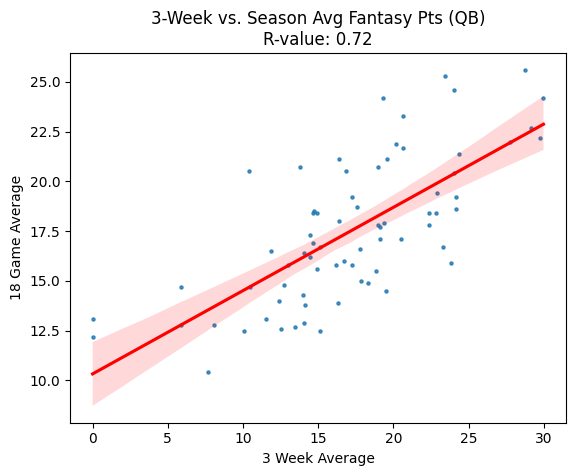

In [86]:

# QB
qb_21_23_3week = qb_21_23.iloc[:,:3]
qb_21_23_3week['AVG'] = ((qb_21_23_3week['1'] + qb_21_23_3week['2'] + qb_21_23_3week['3']) / 3).round(2)
qb_overall_performance = qb_21_23['AVG'] - qb_21_23_3week['AVG']
sns.regplot(x=qb_21_23_3week['AVG'],y=qb_21_23['AVG'], scatter_kws={'s':5}, line_kws={'color':'red'})
plt.xlabel('3 Week Average')
plt.ylabel('18 Game Average')
rval = np.corrcoef(qb_21_23_3week['AVG'], qb_21_23['AVG'])[0,1]
plt.title(f"3-Week vs. Season Avg Fantasy Pts (QB)\nR-value: {rval.round(2)}")
print(rval)

0.6072470594912024


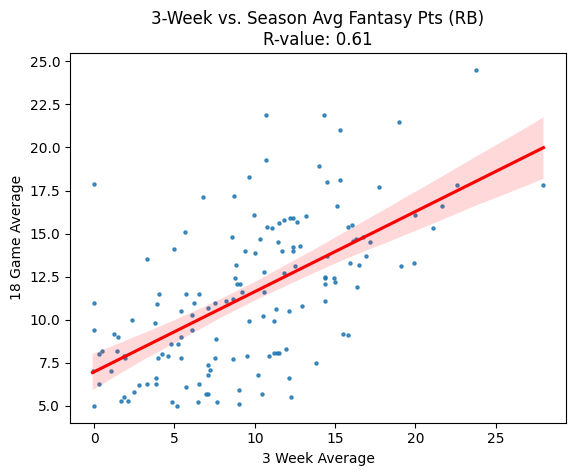

In [87]:
# RB
rb_21_23_3week = rb_21_23.iloc[:,:3]
rb_21_23_3week['AVG'] = ((rb_21_23_3week['1'] + rb_21_23_3week['2'] + rb_21_23_3week['3']) / 3).round(2)
rb_overall_performance = rb_21_23['AVG'] - rb_21_23_3week['AVG']
sns.regplot(x=rb_21_23_3week['AVG'],y=rb_21_23['AVG'], scatter_kws={'s':5}, line_kws={'color':'red'})
plt.xlabel('3 Week Average')
plt.ylabel('18 Game Average')
rval = np.corrcoef(rb_21_23_3week['AVG'], rb_21_23['AVG'])[0,1]
plt.title(f"3-Week vs. Season Avg Fantasy Pts (RB)\nR-value: {rval.round(2)}")
print(rval)